<center> <h1> Análisis Descriptivo De Datos </h1> </center>

## Introducción

¿Alguna vez te has preguntado cuál es la mejor época del año para reservar una habitación de hotel? ¿O la duración óptima de la estancia para obtener la mejor tarifa diaria? ¿Qué pasaría si quisiera predecir si es probable que un hotel reciba una cantidad desproporcionadamente alta de solicitudes especiales?

Este conjunto de datos contiene información de reserva para un hotel urbano y un hotel resort, e incluye información como cuándo se realizó la reserva, la duración de la estadía, la cantidad de adultos, niños y/o bebés, y la cantidad de espacios de estacionamiento disponibles. entre otros features.

Toda la información de identificación personal se ha eliminado de los datos.

In [1]:
# Manipulacion de datos...
import pandas as pd
import numpy as np
# Visualizacion de datos...
import matplotlib.pyplot as plt
import seaborn as sns
# No presentar advertencias......
import warnings
warnings.filterwarnings("ignore")

### Entendimiento y Carga Del Dataset

#### Diccionario

| VARIABLE | DEFINICIÓN |
| --- | --- | 
| **hotel** |H1: Resort Hotel, H2: City Hotel| 
| **is_canceled** |Valor que indica si la reserva fue cancelada (1) o no (0)| 
| **lead_time** |Número de días transcurridos entre la fecha de entrada de la reserva en el PMS y la fecha de llegada| 
| **arrival_date_year** |Año de la fecha de llegada| 
| **arrival_date_month** |Mes de la fecha de llegada| 
| **arrival_date_week** |Número de semana del año para la fecha de llegada| 
| **arrival_date_day** |Día de la fecha de llegada|
| **stays_in_weekend_nights** |Número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para quedarse en el hotel|
| **stays_in_week_nights** |Número de noches de la semana (de lunes a viernes) que el huésped se hospedó o reservó para quedarse en el hotel|
| **adults** |Número de adultos| 
| **children** |Número de niños|
| **babies** |Número de bebés|
| **meal** |Tipo de comida reservada. Las categorías se presentan en paquetes de comida de hospitalidad estándar: Sin definir/SC: sin comida|
| **country** |País de origen. Las categorías se representan en el formato ISO 3155–3:2013|
| **market_segment** |Designación del segmento de mercado. En las categorías, el término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos"|
| **distribution_channel** |Canal de distribución de reservas. El término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos"|
| **is_repeated_guest** |Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0)|
| **previous_cancellations** |Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual|
| **previous_bookings_not_canceled** |Número de reservas anteriores no canceladas por el cliente antes de la reserva actual|
| **reserved_room_type** |Código del tipo de habitación reservado. El código se presenta en lugar de la designación por razones de anonimato.|
| **assigned_room_type** |Código del tipo de habitación asignado a la reserva. A veces, el tipo de habitación asignado difiere del tipo de habitación reservado debido|
| **booking_changes** |Número de cambios/modificaciones realizados en la reserva desde el momento en que se ingresó la reserva en el PMS|
| **deposit_type** |Indicación de si el cliente realizó un depósito para garantizar la reserva. Esta variable puede asumir tres categorías.|
| **agent** |ID de la agencia de viajes que realizó la reserva|
| **company** |DNI de la empresa/entidad que realizó la reserva o responsable del pago de la reserva. Se presenta ID en lugar de designación|
| **days_in_waiting_list** |Número de días que la reserva estuvo en lista de espera antes de ser confirmada al cliente|
| **customer_type** |Tipo de reserva|
| **adr** |Tarifa diaria promedio definida al dividir la suma de todas las transacciones de alojamiento por el número total de noches de estadía|
| **required_car_parking_spaces** |Número de plazas de aparcamiento requeridas por el cliente|
| **total_of_special_requests** |Número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto)|
| **reservation_status** |Último estado de la reserva, asumiendo una de las tres categorías: cancelada, check-out, no-mostrar.|
| **reservation_status_date** |Fecha en la que se estableció el último estado.|

In [2]:
booking = pd.read_csv("../Data/Original/hotel_bookings.csv")
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Dimensionalidad original de los datos...
booking.shape

(119390, 32)

Se observa una cantidad importante de registros, por lo cual se planea un **Muestreo Aleatorio Simple** con el fin de solventar el gasto computacional a la hora de procesar los datos y para futuras modelaciones. Se extrae una muestra de 10 mil registros para procesar:

In [36]:
# MAS al dataset...
#booking = booking.sample(n=10000, random_state=42)

In [37]:
#booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30946,Resort Hotel,0,203,2016,December,49,2,2,5,2,...,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09
40207,City Hotel,1,82,2015,July,29,16,0,3,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16
103708,City Hotel,0,25,2016,December,53,27,0,3,3,...,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
85144,City Hotel,0,1,2016,March,11,9,0,1,1,...,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
109991,City Hotel,0,70,2017,April,16,16,2,2,2,...,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20


In [4]:
print("Numero de registros por hotel:")
booking.hotel.value_counts()

Numero de registros por hotel:


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [5]:
print("Numero de registros por variable respuesta de cancelación:")
booking.is_canceled.value_counts()

Numero de registros por variable respuesta de cancelación:


0    75166
1    44224
Name: is_canceled, dtype: int64

In [6]:
booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Los únicos registros nulos del dataset previenen de los features ***country***, ***agent*** y ***company*** que teniendo en cuenta la naturaleza de los datos y que se quiere predecir la cancelación del cliente, se considera que las variables **agent** y **company** no aportarán al modelo, por lo que se eliminan:

In [7]:
# Eliminando variables que no aportaran al modelo...
booking.drop("agent", axis=1, inplace=True)
booking.drop("company", axis=1, inplace=True)

In [8]:
# Considerando los pocos registros faltantes en country se eliminan...
booking = booking.dropna()
# Validando valores faltantes...
booking.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Análisis exploratorio

In [9]:
booking.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118898.0,0.371352,0.483168,0.00,0.0,0.0,1.0,1.0
lead_time,118898.0,104.311435,106.903309,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118898.0,2016.157656,0.707459,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118898.0,27.166555,13.589971,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118898.0,15.800880,8.780324,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118898.0,0.928897,0.996216,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118898.0,2.502145,1.900168,0.00,1.0,2.0,3.0,41.0
adults,118898.0,1.858391,0.578576,0.00,2.0,2.0,2.0,55.0
children,118898.0,0.104207,0.399172,0.00,0.0,0.0,0.0,10.0
babies,118898.0,0.007948,0.097380,0.00,0.0,0.0,0.0,10.0


In [10]:
# Info general Features...
booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

* De donde vienen la mayoría de los huéspedes?

In [11]:
import geopandas
import folium 
import plotly.io as pli
pli.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [12]:
df_country = booking[booking['is_canceled'] == 0]['country'].value_counts().reset_index()
df_country.columns = ['country', 'No of guests']
df_country

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [13]:
# initialize the map and store it in a m object
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

* Cuánto paga un invitado en promedio en una habitación por noche ?

<Axes: xlabel='reserved_room_type', ylabel='adr'>

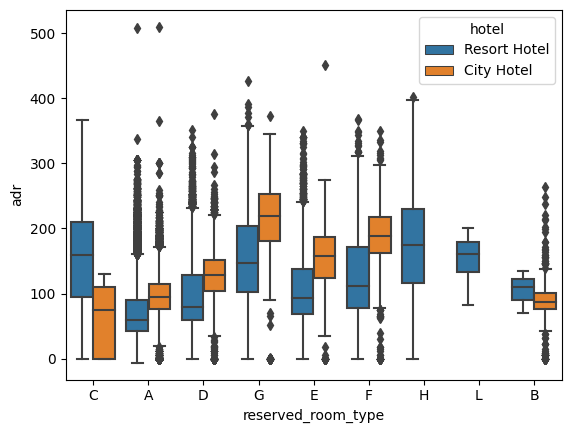

In [14]:
df_pay = booking[booking['is_canceled'] == 0]

sns.boxplot(data = df_pay, x = "reserved_room_type", y = "adr", hue= "hotel")

Se muestra en la gráfica anterior, que el precio promedio por habitación depende significativamente de su tipo y la desviación estándar.

* Cómo varia el precio por noche durante el año ?

In [15]:
data_resort = booking[(booking['hotel'] == 'Resort Hotel') & (booking['is_canceled'] == 0)]
data_city = booking[(booking['hotel'] == 'City Hotel') & (booking['is_canceled'] == 0)]
# Tabla adr promedio por mes en Resort Hotel...
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
# Tabla adr promedio por mes en City Hotel...
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
# Tabla resultante...
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,76.176140,111.856824
1,August,181.348715,118.412083
2,December,68.544415,87.856764
3,February,54.468180,86.183025
4,January,48.940000,82.160634
5,July,150.483553,115.563810
6,June,108.079808,117.702075
7,March,57.362727,90.170722
8,May,76.734804,120.445842
9,November,48.857683,86.499714


In [16]:
# Ordenando tabla...
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [17]:
final_hotel = sort_month(final_hotel, 'month')
final_hotel

,month,price_for_resort,price_for_city_hotel
0,January,48.940000,82.160634
1,February,54.468180,86.183025
2,March,57.362727,90.170722
3,April,76.176140,111.856824
4,May,76.734804,120.445842
5,June,108.079808,117.702075
6,July,150.483553,115.563810
7,August,181.348715,118.412083
8,September,96.288897,112.598452
9,October,61.883818,101.745956


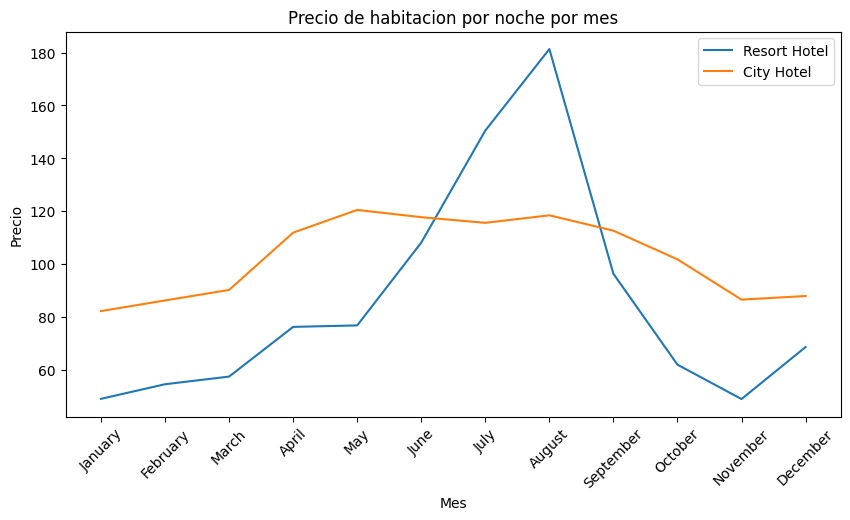

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(data=final_hotel, x="month", y="price_for_resort", label="Resort Hotel")
sns.lineplot(data=final_hotel, x="month", y="price_for_city_hotel", label="City Hotel")
plt.title("Precio de habitacion por noche por mes")
plt.xlabel("Mes")
plt.ylabel("Precio")
plt.legend()
plt.xticks(rotation=45)
plt.show()

* Cuáles son los meses más ocupados?

In [19]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
# City hotel...
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
# Tabla resultante...
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1814,2254
1,February,2253,3064
2,March,2519,4072
3,April,2518,4015
4,May,2523,4579
5,June,2027,4366
6,July,3110,4782
7,August,3237,5381
8,September,2077,4290
9,October,2530,4337


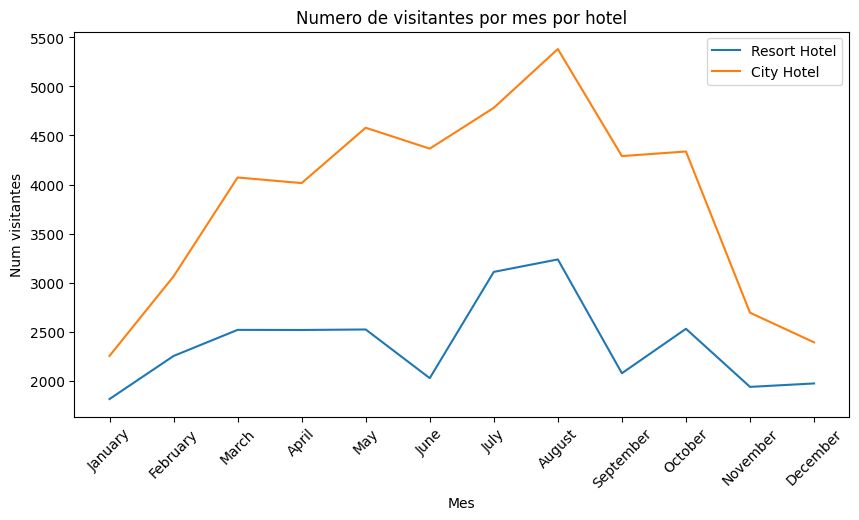

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(data=final_guests, x="month", y="no of guests in resort", label="Resort Hotel")
sns.lineplot(data=final_guests, x="month", y="no of guest in city hotel", label="City Hotel")
plt.title("Numero de visitantes por mes por hotel")
plt.xlabel("Mes")
plt.ylabel("Num visitantes")
plt.legend()
plt.xticks(rotation=45)
plt.show()

* El hotel City tiene más huéspedes durante primavera y otoño, cuando los precios también son más altos. En julio y agosto hay menos visitantes, aunque los precios son más bajos.

* El número de huéspedes del hotel Resort desciende ligeramente de junio a septiembre, que es también cuando los precios son más altos. Ambos hoteles tienen la menor cantidad de huéspedes durante el invierno.

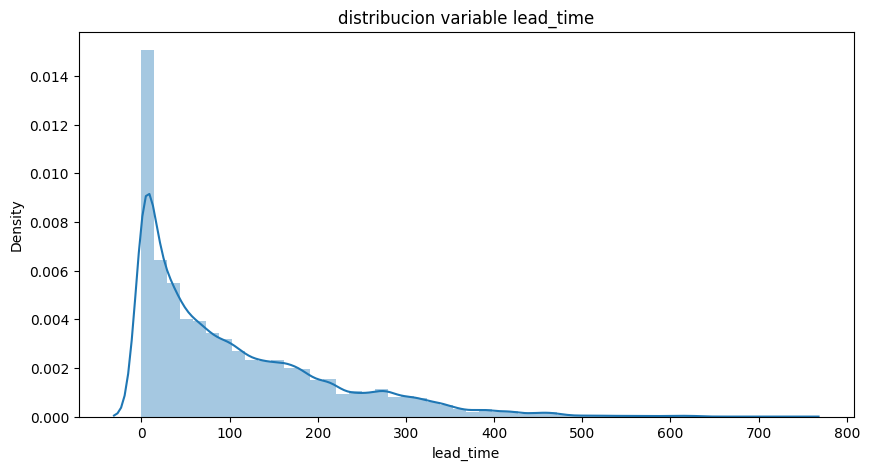

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(booking["lead_time"])
plt.title("distribucion variable lead_time")
plt.show()

In [22]:
booking_filter = booking[booking["lead_time"]<=21]
booking_filter.shape

(32145, 30)

### Análisis de correlación

Text(0.5, 1.0, 'Correlaciones Dataset Hoteles')

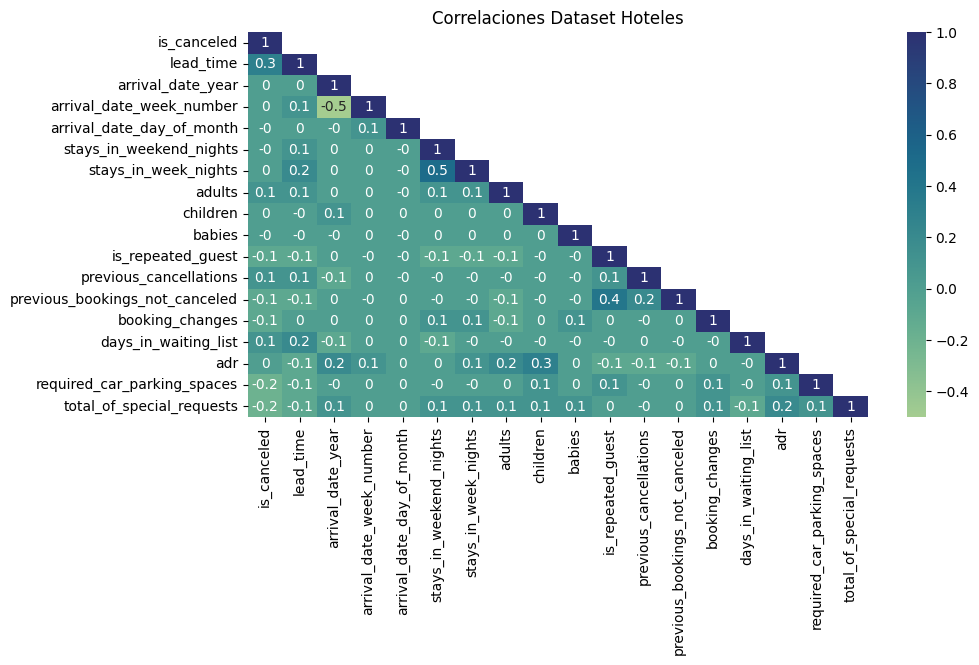

In [23]:
plt.figure(figsize=(10,5))
######## HEATMAP SEMANAL DATASET 1
# mask
mask = np.triu(np.ones_like(booking.corr(), dtype=np.bool_),k=+1)

sns.heatmap(booking.corr().round(1), annot=True, cmap="crest", mask=mask)
plt.title("Correlaciones Dataset Hoteles")

In [24]:
# Correlaciones significativas con respecto a la variable respuesta...
correlation = booking.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.291994
total_of_special_requests         0.235643
required_car_parking_spaces       0.194796
booking_changes                   0.144659
previous_cancellations            0.109922
is_repeated_guest                 0.085179
adults                            0.058381
previous_bookings_not_canceled    0.055493
days_in_waiting_list              0.054016
adr                               0.046199
babies                            0.032521
stays_in_week_nights              0.024110
arrival_date_year                 0.016412
arrival_date_week_number          0.007465
arrival_date_day_of_month         0.006127
children                          0.004751
stays_in_weekend_nights           0.002631
Name: is_canceled, dtype: float64

* Eliminando variables que no aportarán al modelo:

In [25]:
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [26]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', "arrival_date_month",'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

booking.drop(useless_col, axis = 1, inplace = True)

In [27]:
cat_cols = [col for col in booking.columns if booking[col].dtype == 'O']
cat_cols

['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [28]:
cat_df = booking[cat_cols]
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [29]:
booking['reservation_status_date'] = pd.to_datetime(booking['reservation_status_date'])

booking['year_res_status_date'] = booking['reservation_status_date'].dt.year
booking['month_res_status_date'] = booking['reservation_status_date'].dt.month
booking['day_res_status_date'] = booking['reservation_status_date'].dt.day

# Eliminando reservation status date y arrival month...
booking.drop(['reservation_status_date'] , axis = 1, inplace = True)

In [30]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B' 'P']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

reservation_status_date: 
['2015-07-01' '2015-07-02' '2015-07-03' '2015-05-06' '2015-04-22'
 '2015-06-23' '2015-07-05' '2015-07-06' '2015-07-07' '2015-07-08'
 '2015-05-11' '2015-07-16' '2015-05-29' '2015-05-19' '2015-06-19'
 '2015-05-23' '2015-05-18' '2015-07-09' '2015-06-02' '2015-07-13'
 '2015-07-04' '2015-06-29' '2015-06-16' '2015-06-18' '2015-06-12'
 '2015-06-09' '2015-05-26' '2015-07-11' '2015-07-12' '2015-07-17'
 '2015-04-15' '2015-05-13' '2015-07-10' '2015-05-20' '2015-05-12'
 '2015-07-14' '2015-06-17' '2015-05-01' '2015-03-30' '2015-07-1

In [31]:
pd.set_option("display.max_columns",None) # Visualizar todas las columnas
booking.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,year_res_status_date,month_res_status_date,day_res_status_date
0,Resort Hotel,0,342,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,Transient,0.0,0,0,2015,7,1
1,Resort Hotel,0,737,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,Transient,0.0,0,0,2015,7,1
2,Resort Hotel,0,7,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,No Deposit,Transient,75.0,0,0,2015,7,2
3,Resort Hotel,0,13,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,No Deposit,Transient,75.0,0,0,2015,7,2
4,Resort Hotel,0,14,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,Transient,98.0,0,1,2015,7,3


### One Hot Encoding

In [32]:
booking_processing = pd.get_dummies(booking)
print(booking_processing.shape)
booking_processing.head()

(118898, 54)


,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,year_res_status_date,month_res_status_date,day_res_status_date,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0,0,2015,7,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0,0,2015,7,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,7,27,1,0,1,1,0.0,0,0,0,0,75.0,0,0,2015,7,2,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,13,27,1,0,1,1,0.0,0,0,0,0,75.0,0,0,2015,7,2,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,14,27,1,0,2,2,0.0,0,0,0,0,98.0,0,1,2015,7,3,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Escalabilidad de los datos

In [33]:
from sklearn.preprocessing import MinMaxScaler
# Escalando...
scaler = MinMaxScaler()
booking_processing_scaled = scaler.fit_transform(booking_processing)
# Convertir a tipo DataFrame...
data_processing_scaled = pd.DataFrame(booking_processing_scaled)
# Obteniendo nombres columnas...
data_processing_scaled.columns = booking_processing.columns
data_processing_scaled.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,year_res_status_date,month_res_status_date,day_res_status_date,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.0,0.464043,0.5,0.0,0.0,0.00000,0.036364,0.0,0.0,0.0,0.0,0.0,0.001180,0.0,0.0,0.333333,0.545455,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.000000,0.5,0.0,0.0,0.00000,0.036364,0.0,0.0,0.0,0.0,0.0,0.001180,0.0,0.0,0.333333,0.545455,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.009498,0.5,0.0,0.0,0.02439,0.018182,0.0,0.0,0.0,0.0,0.0,0.015053,0.0,0.0,0.333333,0.545455,0.033333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.017639,0.5,0.0,0.0,0.02439,0.018182,0.0,0.0,0.0,0.0,0.0,0.015053,0.0,0.0,0.333333,0.545455,0.033333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.018996,0.5,0.0,0.0,0.04878,0.036364,0.0,0.0,0.0,0.0,0.0,0.019307,0.0,0.2,0.333333,0.545455,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Guardando dataset preprocesado

In [34]:
# Guardando datos preprocesados de entrenamiento...
data_processing_scaled.to_csv("../Data/Preprocessing/preprocessing_data.csv", index = False, header = True)